# Foundations for inference

Statistical inference is concerned with understanding and  drawing conclusions out of data. Relying on the quality of parameter estimates.

**N.B : ** We are going to work on the yrbss file sample used in the book.  The data were retrieved through the website : https://www.cdc.gov/healthyyouth/data/yrbs/data.htm, and focused and the 2013 survey to match the datas from the book

## 4.1 Variability in estimates

We want to try to estimate some features out of the YRBSS file using **samples** :

    1. The average height of high schoolers
    2. The average weight 
    3. How many days per week high schoolers are physically active
    4. How many days per week do they practice weight training

### Uploading the Yrbss file

In [1]:
import pandas as pd
import numpy as np

**N.B :** The data have been formatted and cleaned to meet the book example. Look at the process in the separate file.<br/>
**cf :** https://github.com/chikoungoun/OpenIntro/blob/master/Chapter%204/Yrbss_file_formatting.ipynb

In [2]:
df = pd.read_csv('../Dataset/yrbss.csv',index_col=0)
df.head(15)

,age,gender,grade,height,weight,helmet,active,lifting
0,12.0,male,10.0,1.75,65.77,never,1.0,0.0
1,12.0,male,12.0,1.70,54.89,never,2.0,1.0
2,12.0,male,9.0,1.73,65.77,never,1.0,7.0
3,13.0,male,9.0,1.78,55.79,always,1.0,6.0
4,13.0,male,9.0,1.73,82.56,always,2.0,0.0
5,13.0,male,9.0,1.78,65.77,never,1.0,7.0
6,13.0,male,9.0,1.75,88.45,never,2.0,6.0
7,14.0,male,9.0,1.60,54.43,never,2.0,4.0
8,14.0,male,9.0,1.60,54.43,most of the time,2.0,3.0
9,14.0,male,9.0,1.78,66.23,never,1.0,3.0


### 4.1.1 Point estimates

Generally speaking, a point estimate is a statistic parameter (mean, variance, standard deviation,...) used to estimate a parameter in a population, usually applied on samples. 

Usually, estimates vary from a sample to another depending on the sample observations. We call this difference a **sampling variation**. The estimate won't be exactly equal to the population parameter, but will be very close to it.

* **histograms of <i>weight, height, active</i> and <i>lifting</i>**

Creating a sample of 100 observations from the dataframe

In [3]:
sampl = df.sample(n=100)

In [4]:
sampl.head()

,age,gender,grade,height,weight,helmet,active,lifting
2517,16.0,male,10.0,1.73,70.76,never,1.0,7.0
5396,18.0,male,12.0,1.80,70.31,never,2.0,3.0
10937,18.0,female,12.0,1.57,70.31,never,2.0,0.0
7059,15.0,female,10.0,1.57,36.29,sometimes,2.0,0.0
5984,14.0,female,9.0,1.52,45.36,most of the time,1.0,0.0


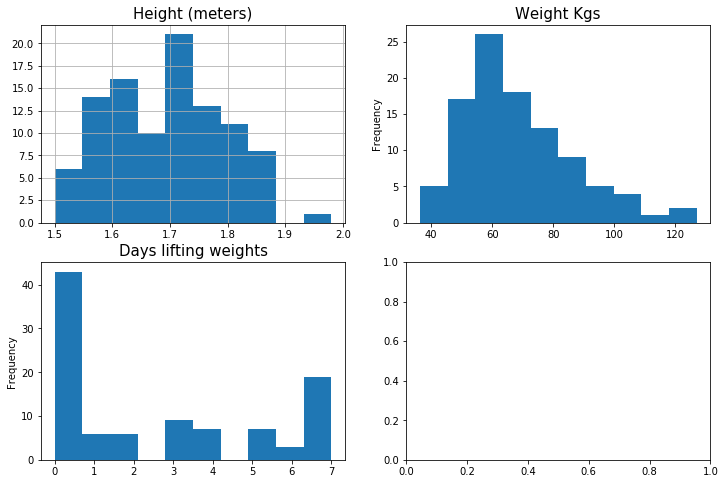

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl['height'].hist(ax=axarr[0][0],)
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl['weight'].plot.hist(ax=axarr[0][1])
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl['lifting'].plot.hist(ax=axarr[1][0])
axarr[1][0].set_title("Days lifting weights", fontsize=15)

We will display another randomly selected sample to pinpoint the differences of result

In [6]:
sampl2 = df.sample(n=100)
sampl2.head()

,age,gender,grade,height,weight,helmet,active,lifting
8543,16.0,female,10.0,1.55,52.16,never,1.0,5.0
2931,16.0,male,11.0,1.73,54.89,never,2.0,1.0
8079,16.0,female,11.0,1.60,58.51,never,2.0,1.0
1714,15.0,male,9.0,1.68,43.09,not riding,1.0,0.0
10425,17.0,female,11.0,1.52,44.00,not riding,1.0,7.0


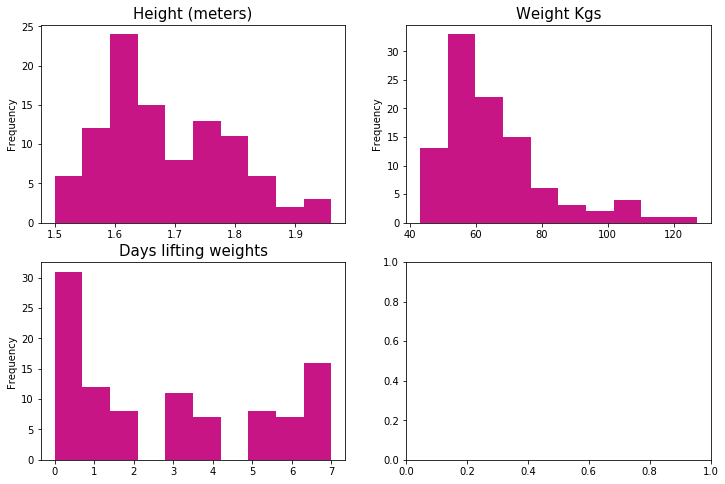

In [7]:
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl2['height'].plot.hist(ax=axarr[0][0],color='mediumvioletred')
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl2['weight'].plot.hist(ax=axarr[0][1],color='mediumvioletred')
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl2['lifting'].plot.hist(ax=axarr[1][0],color='mediumvioletred')
axarr[1][0].set_title("Days lifting weights", fontsize=15)

2.0    76
1.0    24
Name: active, dtype: int64